In [1]:
import os
os.getcwd()

'F:\\Machine-learning\\Assignments'

In [2]:
os.chdir('F:\\Machine-learning\\Assignments\\data_set')
os.getcwd()

'F:\\Machine-learning\\Assignments\\data_set'

In [3]:
import pandas as pd
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.rename({'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'}, axis=1)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.drop('CustomerID', axis=1)

In [6]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [8]:
# df = df.apply(en.fit_transform) is better for, if all columns are object or string types

df.Gender = en.fit_transform(df["Gender"])

In [9]:
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int32
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [11]:
#descriptive statistics
df.describe()

,Gender,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [12]:
df.Age.std() #standard deviation

13.96900733155888

# Data visualization

Text(0.5, 1.0, '2-D scatter')

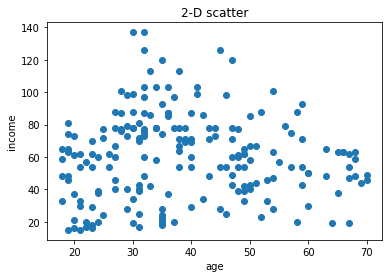

In [13]:
import matplotlib.pyplot as plt

# x = age, y = income
plt.scatter(df.Age, df.Income)

plt.xlabel("age")
plt.ylabel('income')
plt.title('2-D scatter')

Text(0, 0.5, 'Score')

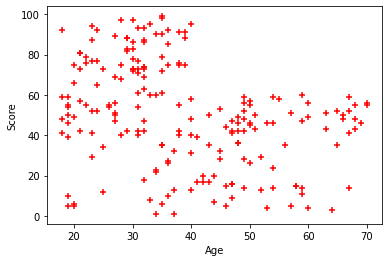

In [14]:
# x = age, y = score
plt.scatter(df.Age, df.Score, color='red', marker='+')

plt.xlabel("Age")
plt.ylabel("Score")

Text(0.5, 1.0, 'Income-Score scatter')

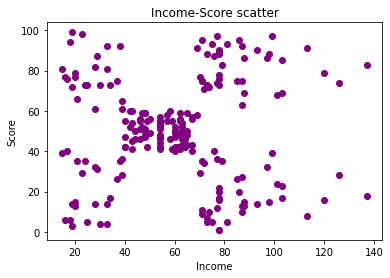

In [15]:
# x = income, y = score
plt.scatter(df.Income, df.Score, color='purple')

plt.xlabel('Income')
plt.ylabel('Score')
plt.title('Income-Score scatter')

# Pairplot visualization

In [16]:
import seaborn as sns

<Figure size 864x720 with 0 Axes>

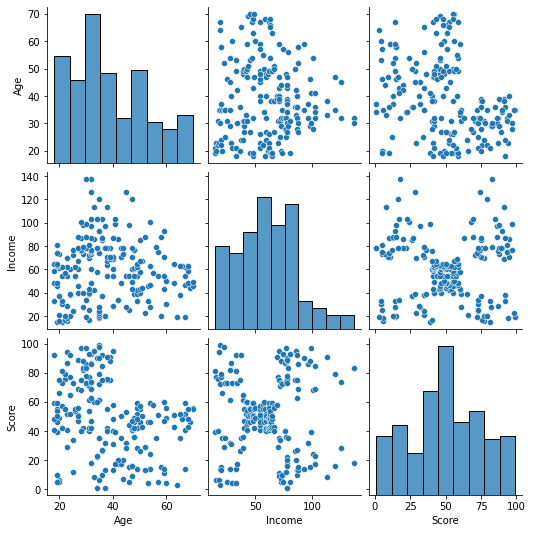

In [17]:
plt.figure(figsize=(12,10))
sns.pairplot(df[['Age','Income','Score']])

# Now, K-means Clustering Algorithm for cluster

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans()    # by default is split into 8 cluster & this is not good taking

In [19]:
kmeans.fit(df[['Income', 'Score']].values)  # for 2d visualization

KMeans()

In [20]:
pred = kmeans.predict(df[['Income', 'Score']].values)  # to avoid warning, just call values field

In [21]:
pred

array([5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 7, 5, 3, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 3, 7, 3, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1])

In [22]:
df['clusters_number'] = pred

In [23]:
df.sample(5)

,Gender,Age,Income,Score,clusters_number
194,0,47,120,16,6
103,1,26,62,55,0
87,0,22,57,55,0
186,0,54,101,24,6
190,0,34,103,23,6


In [24]:
centroids = kmeans.cluster_centers_    # to see all centroid point of all cluster
centroids

array([[ 62.58333333,  47.29166667],
       [109.7       ,  82.        ],
       [ 79.73913043,  13.39130435],
       [ 45.51282051,  51.51282051],
       [ 78.55172414,  82.17241379],
       [ 25.14285714,  19.52380952],
       [109.7       ,  22.        ],
       [ 24.95      ,  81.        ]])

In [25]:
# predict a point
kmeans.predict([[46, 55]])

array([3])

### clusters with default parameter visualization

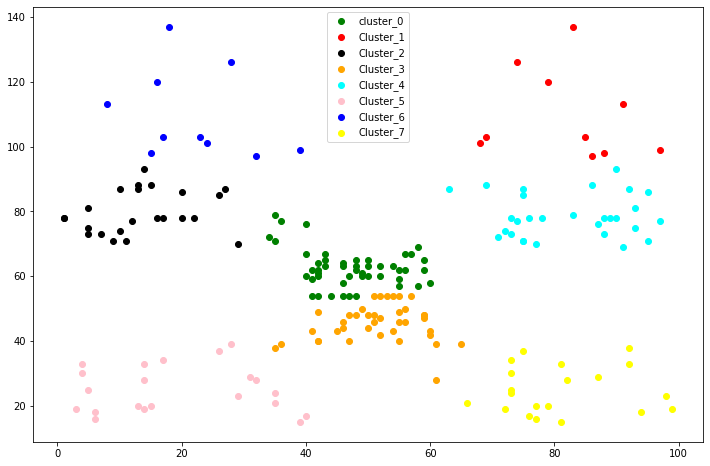

In [26]:
cl0 = df[df.clusters_number == 0 ]
cl1 = df[df.clusters_number == 1 ]
cl2 = df[df.clusters_number == 2 ]
cl3 = df[df.clusters_number == 3 ]
cl4 = df[df.clusters_number == 4 ]
cl5 = df[df.clusters_number == 5 ]
cl6 = df[df.clusters_number == 6 ]
cl7 = df[df.clusters_number == 7 ]

plt.figure(figsize=(12, 8))

plt.scatter(cl0['Score'], cl0['Income'], color='green', label='cluster_0')
plt.scatter(cl1['Score'], cl1['Income'], color='red',label='Cluster_1')
plt.scatter(cl2['Score'], cl2['Income'], color='black',label='Cluster_2')
plt.scatter(cl3['Score'], cl3['Income'], color='orange',label='Cluster_3')
plt.scatter(cl4['Score'], cl4['Income'], color='cyan',label='Cluster_4')
plt.scatter(cl5['Score'], cl5['Income'], color='pink',label='Cluster_5')
plt.scatter(cl6['Score'], cl6['Income'], color='blue',label='Cluster_6')
plt.scatter(cl7['Score'], cl7['Income'], color='yellow',label='Cluster_7')

plt.legend()

In [27]:
# Next step to optimize cluster parameter

# Tuning to k-means cluster

In [28]:
from sklearn.cluster import KMeans

In [29]:
# calculate the Elbow method
wcss = []
clusters = range(1, 15)

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Income', 'Score']])
    wcss.append(kmeans.inertia_)

In [30]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 24995.969781135962,
 21818.114588452183,
 19669.71099830122,
 17595.28888108518,
 15823.742746763313,
 14320.918182339483,
 13133.432800532799]

Text(0.5, 1.0, 'Elbow method')

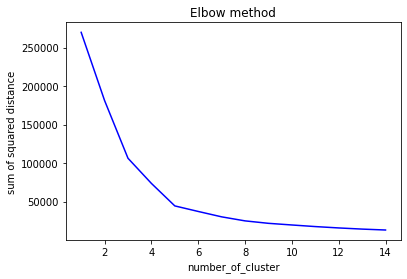

In [31]:
plt.plot(clusters, wcss, color='blue')
plt.xlabel('number_of_cluster')
plt.ylabel('sum of squared distance')
plt.title('Elbow method')

### After tuning, we get our optimal cluster number, k=5

In [32]:
kmeans = KMeans(n_clusters=5)
pred = kmeans.fit_predict(df[['Income', 'Score']])   # fit_predict = fit() + predict() combination
pred

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4,
       1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [33]:
df.clusters_number = pred    # column replace

df.clusters_number.unique()

array([0, 2, 1, 4, 3])

In [34]:
df.sample(5)

,Gender,Age,Income,Score,clusters_number
195,0,35,120,79,4
58,0,27,46,51,1
160,0,56,79,35,3
167,0,33,86,95,4
9,0,30,19,72,2


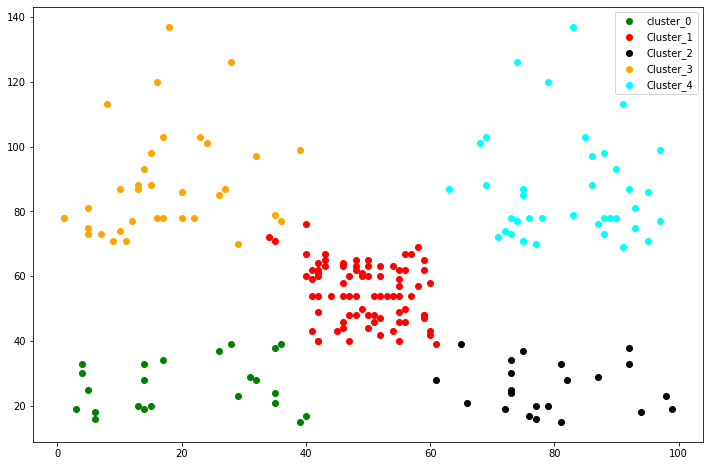

In [35]:
### Data visualization
cl0 = df[df.clusters_number == 0 ]
cl1 = df[df.clusters_number == 1 ]
cl2 = df[df.clusters_number == 2 ]
cl3 = df[df.clusters_number == 3 ]
cl4 = df[df.clusters_number == 4 ]

plt.figure(figsize=(12, 8))

plt.scatter(cl0['Score'], cl0['Income'], color='green', label='cluster_0')
plt.scatter(cl1['Score'], cl1['Income'], color='red',label='Cluster_1')
plt.scatter(cl2['Score'], cl2['Income'], color='black',label='Cluster_2')
plt.scatter(cl3['Score'], cl3['Income'], color='orange',label='Cluster_3')
plt.scatter(cl4['Score'], cl4['Income'], color='cyan',label='Cluster_4')

plt.legend()

In [36]:
center = kmeans.cluster_centers_
center

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])

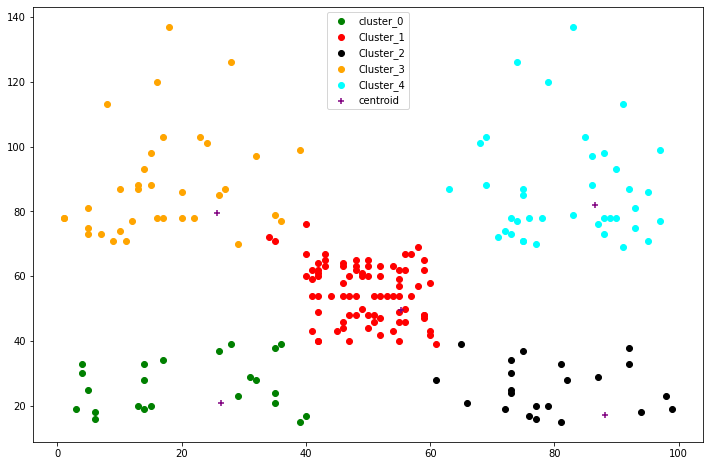

In [37]:
### Data visualization with centroids

cl0 = df[df.clusters_number == 0 ]
cl1 = df[df.clusters_number == 1 ]
cl2 = df[df.clusters_number == 2 ]
cl3 = df[df.clusters_number == 3 ]
cl4 = df[df.clusters_number == 4 ]

plt.figure(figsize=(12, 8))

plt.scatter(cl0['Score'], cl0['Income'], color='green', label='cluster_0')
plt.scatter(cl1['Score'], cl1['Income'], color='red',label='Cluster_1')
plt.scatter(cl2['Score'], cl2['Income'], color='black',label='Cluster_2')
plt.scatter(cl3['Score'], cl3['Income'], color='orange',label='Cluster_3')
plt.scatter(cl4['Score'], cl4['Income'], color='cyan',label='Cluster_4')

plt.scatter(center[:,0], center[:,1], color='purple', marker='+', label="centroid")

# certer[:,0] == means, all row-first column(Income) & center[:,1] == all row-2nd column(Score).

plt.legend()

### For exact cluster filtering, we can use kneed package to auto findout number_of_cluster

In [40]:
# !pip install kneed

from kneed import KneeLocator
kneedle = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [41]:
kneedle

In [42]:
print("So, optimal number of cluster : ", kneedle.knee)

So, optimal number of cluster :  5
